In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pathlib

#matplotlib.use('TkAgg')

'''
out_type can be: 'final' for the final output file of the model after all epochs,
                 'epoch' to select a specific epoch (see mode to determine which epoch file to use)
                 'opt' for optimal ratio output
'''
def moving_average(np_arr, window=1):
    return np.convolve(np_arr, np.ones(window), mode='valid')/window

def read_output_file(folder_name='', out_type='final', epoch=0, mode='absolute', avg_window_size=1):
    current_path = pathlib.Path().absolute()
    directory_path = current_path / folder_name
    
    if out_type == 'opt':
        filename = 'opt_set.out'
    elif out_type == 'final':
        filename = 'test.out'
    elif out_type == 'epoch':
        filename = 'test_'
        if mode == 'approx':
            filename += 'approx_'
        filename += str(epoch) + '.out'
    else:
        print("Unrecognized output type")
        return None
        
    file_path = directory_path / filename
    return moving_average(np.loadtxt(file_path, dtype=np.float32), avg_window_size)


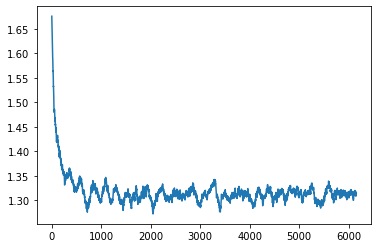

In [173]:
test_output = -1*read_output_file(out_type='opt', epoch=19, folder_name='runs/FeedbackVertex/P30QN8LR1E-4G0999', avg_window_size=100)
#opt_set_output = -1*read_output_file(out_type='opt', folder_name='FeedbackVertexTest')
#print(test_output)
plt.plot(test_output)
plt.show()

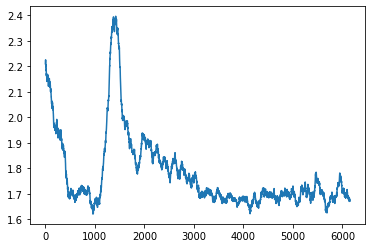

In [223]:
test_output = -1*read_output_file(out_type='opt', epoch=9, folder_name='runs/FeedbackVertex/P15QN5LR1E-4G09999LRD70N30', avg_window_size=100, mode='absolute')
#opt_set_output = -1*read_output_file(out_type='opt', folder_name='FeedbackVertexTest')
#print(test_output)
plt.plot(test_output)
plt.show()